First equation: y = mx + b
Second equation: y = mx + b


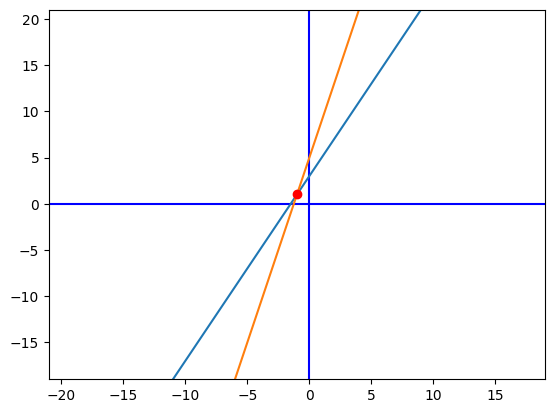

 
Solution: ( -1.0 , 1.0 )


In [2]:
#Creating a graphing calculator 

"""
Creating with following features

1. Graph one or more functions
2. Create a table of (x,y) values
3. Shade above or below the line
4. Solve and graph a system of equations
5. Zoom in or out on a graph
6. Solve quadratic equations
"""

#Importing dependencies
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import *


value = int(input('What operation do you want to perform? (enter 1 - 6): '))

#DEFINING THE FUNCTIONS

#Graph one or more functions
def functional():
    xmin = -10
    xmax = 10
    ymin = -10
    ymax = 10

    fig, ax = plt.subplots()
    plt.axis([xmin, xmax, ymin, ymax]) # window size
    plt.plot([xmin, xmax], [0, 0], 'b') # blue x axis
    plt.plot([0, 0], [ymin, ymax], 'b') # blue y axis

    x = np.linspace(-9, 9, 36)

    num_functions = int(input("How many functions do you want to plot? "))
    equations = []
    for i in range(num_functions):
        eq = input(f"Enter equation {i+1}: ")
        equations.append(eq)

    # Plot each equation
    for eq in equations:
        y = sympy.lambdify('x', eq)(x) # Convert equation to callable function
        plt.plot(x, y)

    plt.show()



#Creating a table of x and y values
    
def tables():
    ax = plt.subplot()
    ax.set_axis_off()

    # Prompt user for function equation
    equation = input("Enter function equation (e.g., '3*x+2'): ")
    title = "y = " + equation  # Update title with the entered equation

    cols = ('x', 'y')
    rows = [[0, 0]]

    for a in range(1, 10):
        # Evaluate the entered equation for each value of x
        y = eval(equation.replace('x', str(a)))
        rows.append([a, y])

    ax.set_title(title)
    plt.table(cellText=rows, colLabels=cols, cellLoc='center', loc='upper left')
    plt.show()

#Shade above or below the line

def shading():
    xmin = -10
    xmax = 10
    ymin = -10
    ymax = 10
    points = 2*(xmax - xmin)
    x = np.linspace(xmin, xmax, points)

    fig, ax = plt.subplots()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.plot([xmin, xmax], [0, 0], 'b')
    plt.plot([0, 0], [ymin, ymax], 'b')

    # Prompt user for function equation
    equation = input("Enter function equation (e.g., 'x+6'): ")

    # Prompt user to specify if they want to shade above or below the function line
    direction = input("Do you want to shade above or below the line? (above/below): ")

    # Evaluate the entered equation
    y = eval(equation.replace('x', 'x'))

    if direction == 'above':
        plt.fill_between(x, y, ymax, facecolor='red')
    elif direction == 'below':
        plt.fill_between(x, y, ymin, facecolor='red')
    else:
        print("Invalid direction! Please enter 'above' or 'below'.")

    plt.plot(x, y)
    plt.show()


#Solve and graph a system of equations
def solvingraphs():
    print("First equation: y = mx + b")
    mb_1 = input("Enter m and b, separated by a comma: ")
    mb_in1 = mb_1.split(",")
    m1 = float(mb_in1[0])
    b1 = float(mb_in1[1])

    print("Second equation: y = mx + b")
    mb_2 = input("Enter m and b, separated by a comma: ")
    mb_in2 = mb_2.split(",")
    m2 = float(mb_in2[0])
    b2 = float(mb_in2[1])

    # Solve the system of equations
    x,y = symbols('x y')
    first = m1*x + b1 - y
    second = m2*x + b2 - y
    solution = linsolve([first, second], (x, y))
    x_solution = round(float(solution.args[0][0]),3)
    y_solution = round(float(solution.args[0][1]),3)

    # Make sure the window includes the solution
    xmin = int(x_solution) - 20
    xmax = int(x_solution) + 20
    ymin = int(y_solution) - 20
    ymax = int(y_solution) + 20
    points = 2*(xmax-xmin)

    # Define the x values once for the graph
    graph_x = np.linspace(xmin,xmax,points)

    # Define the y values for the graph
    y1 = m1*graph_x + b1
    y2 = m2*graph_x + b2

    fig, ax = plt.subplots()
    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'b') # blue x axis
    plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

    # line 1
    plt.plot(graph_x, y1)

    # line 2
    plt.plot(graph_x, y2)

    # point
    plt.plot([x_solution],[y_solution],'ro')

    plt.show()
    print(" ")
    print("Solution: (", x_solution, ",", y_solution, ")")



#Zoom in or out on a graph


def zooming():
    zoom = float(input("Enter the zoom factor: "))
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom

    # Calculate the number of ticks
    if xmin == xmax:
        ticks = 1
    else:
        ticks = max(1, int(round((xmax - xmin) / 20)))

    points = int(10 * zoom - xmin)
    x = np.linspace(xmin, xmax, points)

    fig, ax = plt.subplots()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.plot([xmin, xmax], [0, 0], 'black')
    plt.plot([0, 0], [ymin, ymax], 'black')

    # Line 1
    y1 = x
    plt.plot(x, y1)

    # Line 2
    y2 = 3 * x ** 2 - 4
    plt.plot(x, y2)

    ax.set_xlabel("x values")
    ax.set_ylabel("y values")
    ax.set_title("Some Graph")

    ax.set_xticks(np.arange(xmin, xmax + 1, ticks))  # Ensure ticks is at least 1
    ax.set_yticks(np.arange(ymin, ymax + 1, ticks))  # Ensure ticks is at least 1
    ax.grid(True)
    plt.show()



#Solving for the Quadratic equations
def quadratic():
    print("0 = ax² + bx + c")
    a = float(input("a = "))
    b = float(input("b = "))
    c = float(input("c = "))
    x1 = 0
    x2 = 0

    # Check for non-real answers:
    if b ** 2 - 4 * a * c < 0:
        print("No real roots")
    else:
        # Write your code here, changing x1 and x2
        x1 = (-b + math.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
        x2 = (-b - math.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
        print("The roots are ", x1, " and ", x2)


if value == 1:
    functional()
elif value == 2:
    tables()
elif value == 3:
    shading()
elif value == 4:
    solvingraphs()
elif value == 5:
    zooming()
elif value == 6:
    quadratic()
else:
    print("Invalid choice")
